# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o

# Plan

1. read csv file with titanic data
2. explore 
3. some plotting
4. missing values



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/titanic.csv')
df.shape

(891, 12)

In [ ]:
df

# select rows, columns

In [7]:
# select rows => use loc
df.loc[1]
df[0:5]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
# columns

In [9]:
df.columns
# df.name
# df[ ['PassengerId', 'Survived'] ] 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Passengers who survived
# df[ some boolean condition ]

df[df.Survived == 1].shape
df[(df.Survived == 1) & (df.Sex == 'male')].shape

(233, 12)

In [16]:
# More efficient exploration

In [21]:

df.Embarked.value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# Missing values

# Missing age: how many? and what to do with it

df.Age.isnull()

df[df.Age.isnull()].shape

# Replace with mean of age

# 1. calculate mean of age
age_average = df[ ~df.Age.isnull() ]['Age'].mean()

# 2. replace null values with average age 
df.loc[ df.Age.isnull(),'Age'] = age_average

# 3. No more missing values
df[df.Age.isnull()].shape


(0, 12)

In [ ]:
# Reload data
df = pd.read_csv('../data/titanic.csv')

# Drop the rows with missing values
df = df.dropna(subset = ['Age'])
df.shape


# Plotting




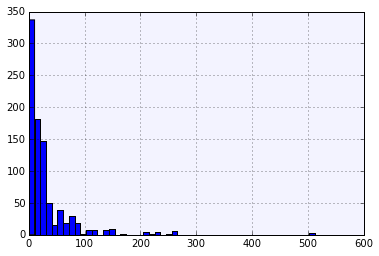

In [35]:
# Histogram of fares
# Scatterplot of Age vs Fare
import matplotlib.pyplot as plt
%matplotlib inline

df.Fare.hist(bins = 50)

/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


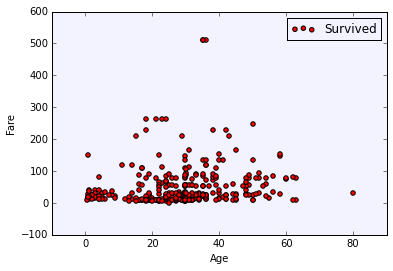

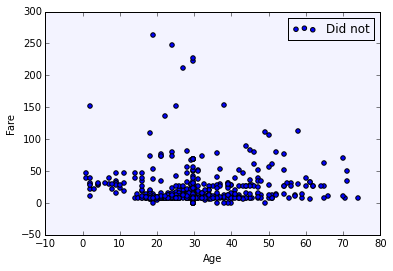

In [53]:
plt.figure()
df[df.Survived==1].plot.scatter(x='Age', y='Fare',color ='r', label ='Survived')
df[df.Survived==0].plot.scatter(x='Age', y='Fare',color ='b', label ='Did not')


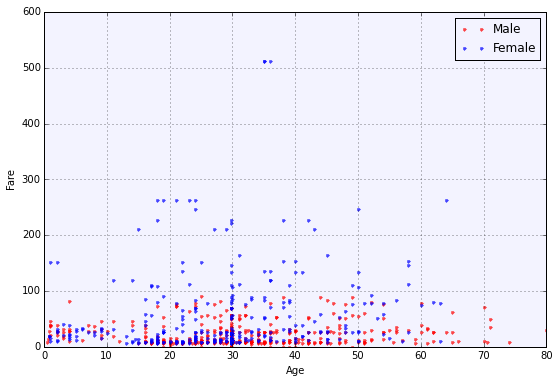

In [65]:
cond = (df.Sex == 'male') & (df.Fare < 100)
fig = plt.figure(figsize=(9,6))
plt.plot( df[cond].Age, df[cond].Fare,'.'  , color='r', alpha = 0.7, label ='Male')
plt.plot( df[~cond].Age, df[~cond].Fare,'.'  , color='b', alpha = 0.7, label ='Female')
plt.legend(loc='best')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()


In [64]:
df[cond].Fare.describe()

count    558.000000
mean      19.540575
std       18.579812
min        0.000000
25%        7.854200
50%       10.500000
75%       26.362500
max       91.079200
Name: Fare, dtype: float64

# More visualization examples

http://pandas.pydata.org/pandas-docs/stable/visualization.html